In [ ]:
import math

import pandas as pd
import difflib as dl
#import Levenshtein as lev
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.decomposition import PCA


In [ ]:
#read the data

infile = "/DMart.csv.zip"
df = pd.read_csv(infile)

df.head()



,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Grocery > Dry Fruits
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Grocery > Dry Fruits


In [ ]:
#data analysis

#see any missing values
count = df.isna().sum()
print ("NAN count in series:\n ", count)



NAN count in series:
  Name                 1
Brand              400
Price                1
DiscountedPrice      1
Category             3
SubCategory          3
Quantity             1
Description          2
BreadCrumbs          3
dtype: int64


In [ ]:
#filling only brand column missing values as its higher quantity and dropping other missing columns due to only less quantity

df['Brand']=df['Brand'].fillna('others')
count = df.isna().sum()
print ("NAN count in series:\n ", count)

NAN count in series:
  Name               1
Brand              0
Price              1
DiscountedPrice    1
Category           3
SubCategory        3
Quantity           1
Description        2
BreadCrumbs        3
dtype: int64


In [ ]:
#now dropping other missing value columns

df=df.dropna()
df.isna().sum()

Name               0
Brand              0
Price              0
DiscountedPrice    0
Category           0
SubCategory        0
Quantity           0
Description        0
BreadCrumbs        0
dtype: int64

In [ ]:
#counting no of items in brand wise (displaying top 10 alone)
df['Brand'].value_counts().head(10)

others          399
Premia          155
Faces Canada     99
Insight          82
Amul             79
Lakme            74
Satyam           68
Gillette         44
Britannia        42
Lotus            40
Name: Brand, dtype: int64

In [ ]:
#counting no of items in category wise 
df['Category'].value_counts().head(10)

Personal Care             1233
Packaged Food             1124
Home & Kitchen             879
Grocery                    840
Dairy & Beverages          429
Specials                   187
Clothing & Accessories      97
Fruits & Vegetables         78
School Supplies             69
Appliances                  53
Name: Category, dtype: int64

In [ ]:
#find "top price" in that brand for that item 
brand_price={}
def top_price():                                        #fn created
  for index,row in df.iterrows():                       #go by row by row
    if row['Brand'] in brand_price:                     #get all prices1,2,3 for a particular barnd nd put in list
      if brand_price.get(row['Brand'])< row['Price']:   #if price high print 
        brand_price[row['Brand']]=row['Price']
    else:
      brand_price[row['Brand']]=row['Price']

top_price()                                             #fn called

brand_price =dict(sorted(brand_price.items(), key=lambda item:item[1],reverse=True))    #get that high price oda item name 



In [ ]:
df_1=pd.DataFrame(brand_price.items())[:20]  #brand la highest price edu nu printing
df_1.head(20)

,0,1
0,Philips,10990.0
1,Bathla,8999.0
2,Godrej,7669.0
3,Bajaj,6275.0
4,Wonderchef,6100.0
5,Morphy Richards,6095.0
6,Portronics,5999.0
7,Crompton Greaves,5600.0
8,Borges,5500.0
9,Boat,4990.0


In [ ]:
#group by subcategory in sorted 
df.groupby(by=["SubCategory","Quantity"],dropna=False,sort=True).sum().head(20)

Price  DiscountedPrice
SubCategory Quantity                         
Appliances  1 U       3028.0           1150.0
            1 Unit     331.0            249.0
            4 Unit     190.0            170.0
Baby & Kids 10 U      2275.0           1698.0
            100 ml     138.0             90.0
            120 U     3148.0           2098.0
            125 gm      80.0             65.0
            200 ml     470.0            325.0
            24 U       210.0            178.0
            28 U       799.0            599.0
            2x75 gm    249.0            199.0
            30 U       399.0            298.0
            300 gm     864.0            864.0
            34 U      1198.0            898.0
            36 U      1149.0            810.0
            3x150 gm   345.0            285.0
            3x75 gm    160.0            135.0
            40 U       699.0            495.0
            400 gm     495.0            380.0
            400 ml    1917.0           1377.0

In [ ]:
###MACHINE LEARNING

In [ ]:
#simple linear regression

In [ ]:
# step 1 initialize x and y values 
# HERE X=price(3rd column) y=discounted price(4th column)
X = df.iloc[:, 2:3].values
y = df.iloc[:, 3:4].values
print (y)

[[329.]
 [ 85.]
 [175.]
 ...
 [ 40.]
 [ 72.]
 [ 75.]]


In [ ]:
#step -2  splitting data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
#step 3 training slr model on training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#step 4 predicting test results
y_pred = regressor.predict(X_test)

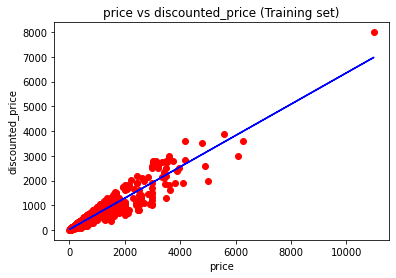

In [ ]:
#step 5 visualizing training set
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('price vs discounted_price (Training set)')
plt.xlabel('price')
plt.ylabel('discounted_price')
plt.show()

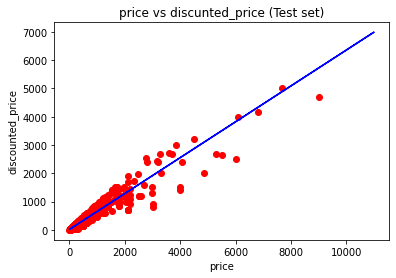

In [ ]:
#step -6 visualizing test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('price vs discunted_price (Test set)')
plt.xlabel('price')
plt.ylabel('discounted_price')
plt.show()


In [ ]:
### Multiple linear regression 
df[['Quantity','Quantity_1'  ]]=df['Quantity'].str.split(' ', 1, expand=True)
df.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,Quantity_1
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500,India,Grocery > Grocery/Dry Fruits,gm
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100,India,Grocery > Grocery/Dry Fruits,gm
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200,India,Grocery > Grocery/Dry Fruits,gm
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500,USA,Grocery > Dry Fruits,gm
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1,USA,Grocery > Dry Fruits,kg


In [ ]:
df.dtypes

Name                object
Brand               object
Price              float64
DiscountedPrice    float64
Category            object
SubCategory         object
Quantity            object
Description         object
BreadCrumbs         object
Quantity_1          object
dtype: object

In [ ]:
from pandas.api.types import is_numeric_dtype
is_numeric_dtype(df['Quantity'])

False

In [ ]:

df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
print(df.dtypes)

Name                object
Brand               object
Price              float64
DiscountedPrice    float64
Category            object
SubCategory         object
Quantity           float64
Description         object
BreadCrumbs         object
Quantity_1          object
dtype: object


In [ ]:
#step 1  initialize x and y 
X = df.iloc[:, 2:4].values
y = df.iloc[:, 6:7 ].values
print (X)

[[451. 329.]
 [109.  85.]
 [202. 175.]
 ...
 [ 55.  40.]
 [110.  72.]
 [ 90.  75.]]


In [ ]:
print(y)

[['500']
 ['100']
 ['200']
 ...
 ['1']
 ['1']
 ['1']]


In [ ]:
### extracting only numerical column in x 
#note(all columns should be in float not in obj for this code to work)
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')  #here 2=convert 3 columns into 2 columns
#X = np.array(ct.fit_transform(X))
#print(X)

In [ ]:
#step 2 spilt into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#first three codes -replacing o with infinity values and last code fills 0 for all nan values in whole df


df['Quantity'].replace([np.inf, -np.inf], 0)
df['Price'].replace([np.inf, -np.inf], 0)
df['DiscountedPrice'].replace([np.inf, -np.inf], 0)
df.fillna(0)

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,Quantity_1
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500.0,India,Grocery > Grocery/Dry Fruits,gm
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100.0,India,Grocery > Grocery/Dry Fruits,gm
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200.0,India,Grocery > Grocery/Dry Fruits,gm
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500.0,USA,Grocery > Dry Fruits,gm
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1.0,USA,Grocery > Dry Fruits,kg
...,...,...,...,...,...,...,...,...,...,...
5184,Navneet Youva A4 Notebook - Assorted,Navneet,55.0,36.0,School Supplies,School Needs,1.0,OverviewEach book has an index page with label...,School Supplies > School Needs,Book
5185,Navneet Youva Longbook Journal - Assorted,Navneet,85.0,69.0,School Supplies,School Needs,1.0,OverviewStrong & sturdy case binding. Easy to ...,School Supplies > School Needs,Book
5186,Navneet Youva Long Notebook - Assorted,Navneet,55.0,40.0,School Supplies,School Needs,1.0,OverviewAttractive colour and designs. Easy to...,School Supplies > School Needs,Book
5187,Navneet Youva Drawing Book - Assorted,Navneet,110.0,72.0,School Supplies,School Needs,1.0,OverviewDrawing book has attractive cover desi...,School Supplies > School Needs,Book
